<a href="https://colab.research.google.com/github/alxogm/she2022/blob/main/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

Cargamos los datos que vamos a trabajar. 

In [86]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/Divulgación/She++2022/train/*')


In [88]:
len(files)

4340

In [87]:
#numero de pixeles para nuestras imágenes. 
num_px=64

Veamos algunas de las imagenes

Preparamos el dataset de entrenamiento. 

In [71]:
train_x=[]
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file: 
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

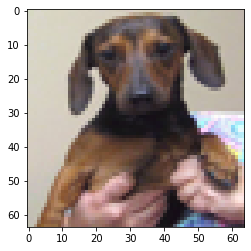

In [72]:
plt.imshow(train_x[1])


Preparamos el dataset de prueba

In [89]:
test_x=[]
test_y=[]
for file in files[4300:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file: 
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

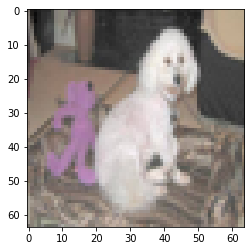

In [90]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen la imágen para que sean arreglos de una dimensión. 

In [91]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes 

In [92]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.

Empezemos por definir algunas funciones importantes. 

In [93]:
#Función de activación. Sigmoide
def sigmoid(z):
    s=1./(1+np.exp(-z))   
    return s

In [94]:
#Inicializamos los pesos y los sesgos a cero. 
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0.
    return w, b

In [95]:
#Calculamos nuestra función de activación, función de costo y las derivadas, dw y db
def propagate(w, b, X, Y):
    m = X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw = (1/m)* np.dot(X,(A-Y).T)
    db = (1/m)* np.sum(A-Y)
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [96]:
#Realizamos la optimización de nuestra red. 

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):

    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [97]:
#Calculamos la predicción que hace nuestra función
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
     
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i] = int(1)
        else:
            Y_prediction[0,i] = int(0)
    
    return Y_prediction

In [98]:
#Ponemos todo junto en nuestro modelo 
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):  
    w,b=initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)
    w=params["w"]
    b=params["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
        
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [99]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=4000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.319724
Cost after iteration 200: 0.746012
Cost after iteration 300: 0.115527
Cost after iteration 400: 0.083228
Cost after iteration 500: 0.069540
Cost after iteration 600: 0.060468
Cost after iteration 700: 0.053772
Cost after iteration 800: 0.048532
Cost after iteration 900: 0.044279
Cost after iteration 1000: 0.040738
Cost after iteration 1100: 0.037735
Cost after iteration 1200: 0.035149
Cost after iteration 1300: 0.032898
Cost after iteration 1400: 0.030918
Cost after iteration 1500: 0.029163
Cost after iteration 1600: 0.027595
Cost after iteration 1700: 0.026187
Cost after iteration 1800: 0.024915
Cost after iteration 1900: 0.023760
Cost after iteration 2000: 0.022706
Cost after iteration 2100: 0.021741
Cost after iteration 2200: 0.020854
Cost after iteration 2300: 0.020036
Cost after iteration 2400: 0.019279
Cost after iteration 2500: 0.018577
Cost after iteration 2600: 0.017924
Cost after iteration 2700: 0.017314
Cost

In [100]:
#Veamos algunos de los ejemplos de nuestra clasificación. 

y = 0, you predicted that it is a "0.0


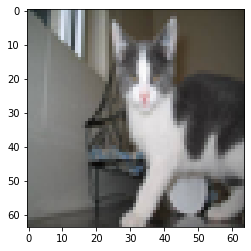

In [101]:
index=6
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + str(logistic_regression_model['Y_prediction_test'][0,index]))